## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import quadratic_equation as qef
importlib.reload(qef);

2023-11-02 15:54:53.349372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Architektura gęsta/w pełni połączona - ang. dense/fully connected

Standardowa architektura sieci neuronowej to wiele warstw następujących **sekwencyjnie** po sobie.

* warstwy ukryte mają zwykle funkcję aktywacji ReLu:
    <br></br>
     ```Python
     tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
     ```
     <br></br>
* warsty wyjściowe mają zwykle funkcję aktywacji:
    * **liniową** - dla zagadnienia regresji:
      <br></br>
     ```Python
     tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
     ```
     <br></br>
    * **softmax** - dla zagadnienia klasyfikacji:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Funkcję aktywacji można określić używając nazwy - `relu`, lub podając funkcję:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

W architekturze gęstej dana warstwa przyjmuje jako wejście wyjście z warstwy poprzedniej. Wyjątkiem jest oczywiście warstwa wejściowa.

In [2]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)
            
outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)   

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)
model.summary()

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 3)                 15        
                                                                 
 layer_2 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-02 15:54:54.841605: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 15:54:54.844774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 15:54:54.844889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Definicję modelu dużo wygodniej jest jednak zadać w pętli.

**Proszę:**

Napisać funkcję `getModel()`, która przyjmuje następujące argumenty:

* kształ danych wejściowych: `inputShape`
* listę zwierająca liczby neuronów w kolejnych warstwach, włączając warstwę wyjściową: `nNeurons = [64,32,16,1]`
* funkcje aktywacji dla warst ukrytych i wyjściowej: `hiddenActivation, outputActivation` z odpowiednimi wartościami domyślnymi

In [3]:
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear"):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model
#END_SOLUTION

model = getModel((128), [64,32,16,1])
model.summary()
pass

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 128)]             0         
                                                                 
 layer_0 (Dense)             (None, 64)                8256      
                                                                 
 layer_1 (Dense)             (None, 32)                2080      
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 layer_3 (Dense)             (None, 1)                 17        
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 10883 (42.51 KB)
Trainable params: 10883 (42.51 K

**Proszę:**

* wygenerować 2$\times$1000 par $(x,y)$, gdzie:
    *  pierwszy tysiąc to dane uczące, drugi to walidacyjne
    * $x$ - liczby losowe rozkładem płaskim w zakresie $[0,1]$
    *  
    $$
    \huge{
    y = 
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$

* zdefiniować i wytrenować sieć neuronową która odtwarza dane
* narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* narysować histogram różnicy `model-dane` z przedziałami zadanymi przez `bins=np.arange(-1.05,1.05,0.1))`
* znależć model który na zbiorze walidacyjnym uzyska precyzję lepszą niż $10^{-3}$, gdzie precyzja jest zdefiniowana jako: 
$$
\huge{
\delta = \max_{|x-0.5|>0.01}{|f(x) - Y|}
}
$$

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów i parametrem uczenia

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 256)               512       
                                                                 
 layer_1 (Dense)             (None, 256)               65792     
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 66561 (260.00 KB)
Trainable params: 66561 (260.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-02 15:54:56.379701: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e20ff70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-02 15:54:56.379726: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-11-02 15:54:56.383574: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-02 15:54:56.498911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-02 15:54:56.579275: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 0s 1ms/step
Delta on training set: 0.4616
31/31 [==============================] - 0s 1ms/step
Delta on validation set: 0.0061
CPU times: user 3min 49s, sys: 15.7 s, total: 4min 4s
Wall time: 2min 48s


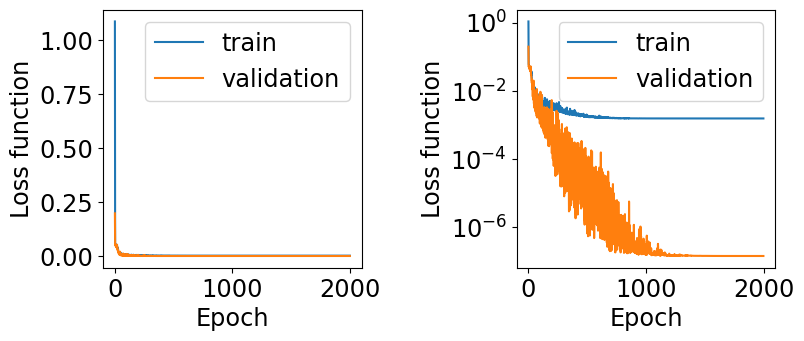

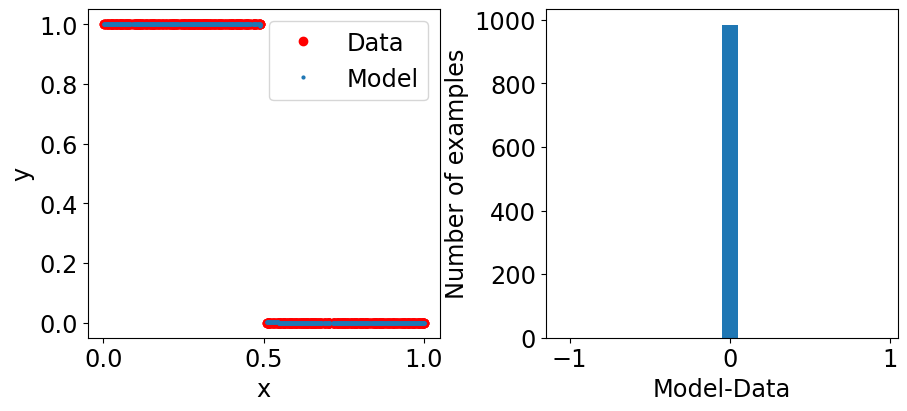

In [4]:
%%time 

inputShape = 1
nNeurons = np.array([256,256])
model = getModel(inputShape, nNeurons)
model.summary()

initial_learning_rate = 5E-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])

x = np.random.default_rng().uniform(0,1, (2000,1))
y = (x>0)*(x<0.5)
y = y.astype(np.float64)
x_train, y_train = x[0:1000,:], y[0:1000,:]
x_val, y_val = x[1000:,:], y[1000:,:]
mask = np.abs(x_val-0.5)>1E-2
x_val = x_val[mask].reshape(-1,1)
y_val = y_val[mask].reshape(-1,1)

nEpochs = 2000
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = 32,
                    validation_data=(x_val, y_val),
                    verbose=0)
plf.plotTrainHistory(history)

y_pred = model.predict(x_train)
delta = np.max(y_train - y_pred)
print(colored("Delta on training set:","blue"), "{:3.4f}".format(delta))

y_pred = model.predict(x_val)
delta = np.max(y_val - y_pred)
print(colored("Delta on validation set:","blue"), "{:3.4f}".format(delta))

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].plot(x_val,y_val,"o", color="red", label="Data");
axes[0].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend();

axes[1].hist(y_val-y_pred, bins=np.arange(-1.05,1.05,0.1))
axes[1].set_xlabel('Model-Data')
axes[1].set_ylabel('Number of examples')

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

**Proszę:**

* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

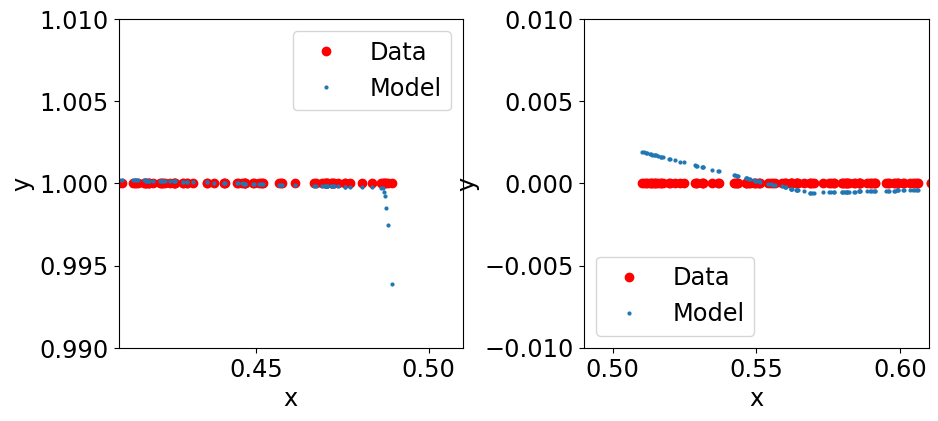

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].plot(x_val,y_val,"o", color="red", label="Data");
axes[0].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim([0.41, 0.51])
axes[0].set_ylim([0.99, 1.01])
axes[0].legend();

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim([0.49, 0.61])
axes[1].set_ylim([-0.01, 0.01])
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.35)

**Proszę:**

* narysować dane i odpowiedź modelu w zakresie x$\in$[-5,5] 

63/63 [==============================] - 0s 680us/step


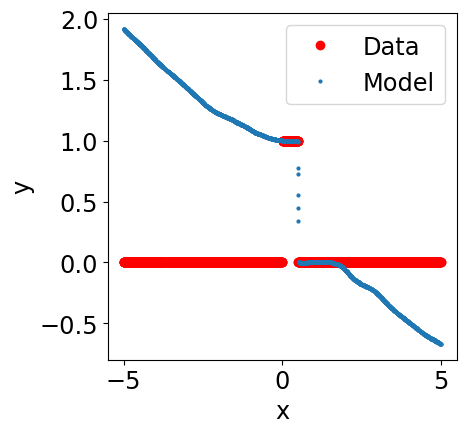

In [6]:
x_val = np.random.default_rng().uniform(-5,5, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axes = plt.subplots(1, 1, figsize=(4.5,4.5))
axes.plot(x_val,y_val,"o", color="red", label="Data");
axes.plot(x_val,y_pred,"o", markersize=2, label="Model")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();

**Proszę:**

* wygenerować 2$\times$1000 par $(x,y)$, gdzie:
    *  pierwszy tysiąc to dane uczące, drugi to walidacyjne
    * $x$ - liczby losowe rozkładem płaskim w zakresie $[0,1]$
    * $y$ - liczby losowe rozkładem płaskim w zakresie $[0.9,1.1]$

* zdefiniować i wytrenować sieć neuronową która odtwarza dane uczące
* narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* narysować histogram różnicy `model-dane` z przedziałami zadanymi przez `bins=np.arange(-1.05,1.05,0.1))`

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów i parametrem uczenia

## Sieć rozwiązująca równane kwadratowe.

**Proszę:**

Przygotować zbior danych dotyczących rozwiązywania równania kwadratowego:

* x - współczynniki równania w zakresie [0,1]$^{3}$
* y - rozwiązywalność równania: `True/False`.
* ustawić kształt y na `(-1,1)`
* 1000 przykładów dla zbioru uczącego
* 1000 przykładów dla zbioru walidacyjnego
* wypisać na ekran kształty danych. 

In [7]:
nSamples = 1000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

x_val = qef.quadraticEqGenertor(nSamples)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (1000, 3) (1000, 1)


/scratch_hdd/akalinow/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/modules/quadratic_equation.py:17: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


**Proszę:**

* wytrenować sieć która odpowieda na pytanie: **Czy równanie ma rozwiązania?**
* czy uda się uzyskać na zbiorze walidacyjnym wartości metryk:
    * poprawna odpowiedź w >99.9% przypadkach
* cały kod zawrzeć w funkcji `quadraticEqMLSolver(x_train, y_train, x_val, y_val)`. Funkcja powinna wykonywać trening, rysować rysunki, oraz zwracać wytrenowany model 

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 3)]               0         
                                                                 
 layer_0 (Dense)             (None, 64)                256       
                                                                 
 layer_1 (Dense)             (None, 64)                4160      
                                                                 
 layer_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_3 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12801 (50.00 K

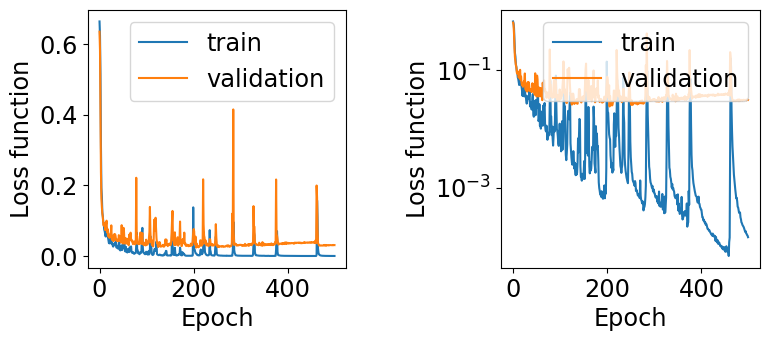

In [8]:
%%time 

def quadraticEqMLSolver(x_train, y_train, x_val, y_val):
    ##BEGIN_SOLUTION
    inputShape = 3
    nNeurons = np.array([64,64,64])
    model = getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="sigmoid")
    model.summary()
    
    initial_learning_rate = 1E-3
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=2000,
                    decay_rate=0.95,
                    staircase=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['Accuracy','FalsePositives'])
    
    nEpochs = 500
    history = model.fit(x=x_train, y=y_train, 
                        epochs=nEpochs, 
                        batch_size = 32,
                        validation_data=(x_val, y_val),
                        verbose=0)
    plf.plotTrainHistory(history)
    model.evaluate(x_train, y_train)
    
    val_loss, val_acc, val_fpr = model.evaluate(x_val, y_val)
    val_fpr /= len(y_val)
    
    print(colored("Validation accuracy:","blue"),val_acc)
    print(colored("Validation FPR","blue"),val_fpr)
    ##BEGIN_SOLUTION
    return model

quadraticEqMLSolver(x_train, y_train, x_val, y_val);

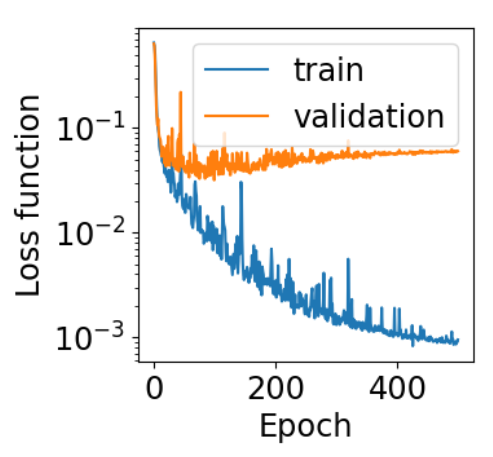

**przetrenowanie:** model dopasowuje się do konkretnych wartości
obecnych w zbiorze uczącym, ale słano się `generalizuje` - reaguje na 
nowe wartości nieobecne w zbiorze uczącycm.

**typowy objaw:** funkcja straty maleje na zbiorze uczącym, ale zatrzymuje się, lub nawet zaczyna rosnąć na zbiorze testowym.

**lekarstwa:**

* zwiększenie zbioru uczącego
* regularyzacja modelu

**Proszę:**


* zwiększyć rozmiar próbek do 10 000 przykładow i przeprowadzić trening ponownie

In [ ]:
%%time
#BEGIN_SOLUTION
nSamples = 10000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

x_val = qef.quadraticEqGenertor(nSamples)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

Training data shapes:  (10000, 3) (10000, 1)
Validation data shapes:  (10000, 3) (10000, 1)
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 3)]               0         
                                                                 
 layer_0 (Dense)             (None, 64)                256       
                                                                 
 layer_1 (Dense)             (None, 64)                4160      
                                                                 
 layer_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_3 (Dense)             (None, 64)                4160      
                                                                 
 output (Dense)              (None, 1)                 65        
                                     

**Proszę:**

* użyć regularyzacji L2 w warstwach ukrytych

**Wskazówka**: można zmodyfikować funkcję generującą model

In [ ]:
%%time
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear"):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  kernel_regularizer=tf.keras.regularizers.L2(l2=0.001),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass